## Observations and Insights 

In [ ]:
#Upon analysing the data for the included treatment regimines, Capolmulin and Ramicane appear to be similarly 
#effective treaments that surpass the other options in their effectiveness at reducing tumor volume. Additionally, 
#both drugs offer approximately 40% reduction in tumor size over the placebo. Both drugs show a low mean and standard 
#deviation.  I suggest expanding the study of both of these treatments for further analysis. 

In [343]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [344]:
merge_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [345]:
# Checking the number of mice.
mouse_df=merge_df["Mouse ID"]
len(mouse_df.unique())

249

In [346]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [347]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanmouse_df=clean_df.drop_duplicates(subset=['Mouse ID'], keep='last')
cleanmouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [348]:
# Checking the number of mice in the clean DataFrame.
len(cleanmouse_df)

249

## Summary Statistics

In [349]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [350]:
capomulin_stat = cleanmouse_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
ceftamin_stat = cleanmouse_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
infubinol_stat = cleanmouse_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ramicane_stat = cleanmouse_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]

In [351]:
cap_mean=capomulin_stat["Tumor Volume (mm3)"].mean()
cap_median=capomulin_stat["Tumor Volume (mm3)"].median()
cap_var=capomulin_stat["Tumor Volume (mm3)"].var()
cap_std=capomulin_stat["Tumor Volume (mm3)"].std()
cap_sem = [sem(capomulin_stat["Tumor Volume (mm3)"])]
print("Capomulin Mean: ", cap_mean,
     "Capomulin Median: ",cap_median,
     "Capomulin Median: ",cap_median,
     "Capomulin Variance: ",cap_var,
     "Capomulin Std. Dev.: ",cap_std,
     "Capomulin SEM: ",cap_sem)

Capomulin Mean:  36.66756771920001 Capomulin Median:  38.125164399999996 Capomulin Median:  38.125164399999996 Capomulin Variance:  32.66337761307918 Capomulin Std. Dev.:  5.7151883270001855 Capomulin SEM:  [1.143037665400037]


In [352]:
cef_mean=ceftamin_stat["Tumor Volume (mm3)"].mean()
cef_median=ceftamin_stat["Tumor Volume (mm3)"].median()
cef_var=ceftamin_stat["Tumor Volume (mm3)"].var()
cef_std=ceftamin_stat["Tumor Volume (mm3)"].std()
cef_sem = [sem(ceftamin_stat["Tumor Volume (mm3)"])]
print("Ceftamin Mean: ", cef_mean,
     "Ceftamin Median: ",cef_median,
     "Ceftamin Median: ",cef_median,
     "Ceftamin Variance: ",cef_var,
     "Ceftamin Std. Dev.: ",cef_std,
     "Ceftamin SEM: ",cef_sem)

Ceftamin Mean:  57.7539768252 Ceftamin Median:  59.85195552 Ceftamin Median:  59.85195552 Ceftamin Variance:  69.98273477172455 Ceftamin Std. Dev.:  8.365568406971791 Ceftamin SEM:  [1.6731136813943586]


In [353]:
inf_mean=infubinol_stat["Tumor Volume (mm3)"].mean()
inf_median=infubinol_stat["Tumor Volume (mm3)"].median()
inf_var=infubinol_stat["Tumor Volume (mm3)"].var()
inf_std=infubinol_stat["Tumor Volume (mm3)"].std()
inf_sem = [sem(infubinol_stat["Tumor Volume (mm3)"])]
print("Infubinol Mean: ", inf_mean,
     "Infubinol Median: ",inf_median,
     "Infubinol Median: ",inf_var,
     "Infubinol Std. Dev.: ",inf_std,
     "Infubinol SEM: ",inf_sem)

Infubinol Mean:  58.1782457852 Infubinol Median:  60.16518046 Infubinol Median:  74.01087513388855 Infubinol Std. Dev.:  8.602957348138403 Infubinol SEM:  [1.7205914696276807]


In [354]:
ram_mean=ramicane_stat["Tumor Volume (mm3)"].mean()
ram_median=ramicane_stat["Tumor Volume (mm3)"].median()
ram_var=ramicane_stat["Tumor Volume (mm3)"].var()
ram_std=ramicane_stat["Tumor Volume (mm3)"].std()
ram_sem = [sem(ramicane_stat["Tumor Volume (mm3)"])]
print("Ramicane Mean: ", ram_mean,
     "Ramicane Median: ",ram_median,
     "Ramicane Median: ",ram_var,
     "Ramicane Std. Dev.: ",ram_std,
     "Ramicane SEM: ",ram_sem)

Ramicane Mean:  36.1913904284 Ramicane Median:  36.56165229 Ramicane Median:  32.16635422825908 Ramicane Std. Dev.:  5.671538964713112 Ramicane SEM:  [1.1343077929426224]


In [355]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
regimen_df = cleanmouse_df.groupby(['Drug Regimen'])
regmean_df=regimen_df.mean()
regmedian_df=regimen_df.median()
regvar_df=regimen_df.var()
regstd_df=regimen_df.std()
    

In [356]:
regmean=regmean_df["Tumor Volume (mm3)"]
regmedian=regmedian_df["Tumor Volume (mm3)"]
regvar=regvar_df["Tumor Volume (mm3)"]
regstd=regstd_df["Tumor Volume (mm3)"]


In [357]:
summary_df = pd.DataFrame({"Mean": regmean,
                              "Median": regmedian,
                              "Variance": regvar,
                              "Std. Dev.": regstd})
summary_df

,Mean,Median,Variance,Std. Dev.
Drug Regimen,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188
Ceftamin,57.753977,59.851956,69.982735,8.365568
Infubinol,58.178246,60.165180,74.010875,8.602957
Ketapril,62.806191,64.487812,98.921330,9.945920
Naftisol,61.205757,63.283288,106.029927,10.297083
Placebo,60.508414,62.030594,78.759797,8.874672
Propriva,56.736964,55.841410,69.349002,8.327605
Ramicane,36.191390,36.561652,32.166354,5.671539
Stelasyn,61.001707,62.192350,90.331586,9.504293


## Bar and Pie Charts

In [358]:
regcount_df=regimen_df.count()
regcount_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,25,25,25,25,25,25,25
Ceftamin,25,25,25,25,25,25,25
Infubinol,25,25,25,25,25,25,25
Ketapril,25,25,25,25,25,25,25
Naftisol,25,25,25,25,25,25,25
Placebo,25,25,25,25,25,25,25
Propriva,25,25,25,25,25,25,25
Ramicane,25,25,25,25,25,25,25
Stelasyn,24,24,24,24,24,24,24


In [359]:
users = regcount_df["Mouse ID"]
users

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

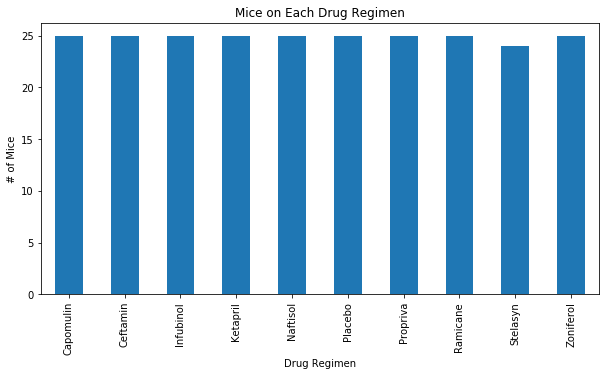

<Figure size 432x288 with 0 Axes>

In [360]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Create a bar chart based upon the above data
users.plot(kind="bar", figsize=(10,5))

# Set a title for the chart
plt.title("Mice on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")

plt.show()
plt.tight_layout()


In [361]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
users = regcount_df["Mouse ID"]
x_axis = np.arange(len(users))

Text(0, 0.5, '# of Mice')

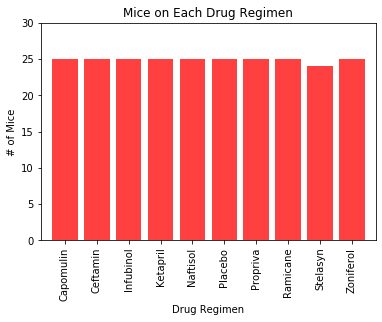

In [362]:
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
plt.bar(x_axis, users, color='r', alpha=0.75, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", 
                            "Propriva","Ramicane","Stelasyn","Zoniferol"],rotation='vertical')
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
# Sets the y limits of the current chart
plt.ylim(0, max(users)+5)
# Give our chart some labels and a tile
plt.title("Mice on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")

In [363]:
sex_df = cleanmouse_df.groupby(['Sex'])
sex=sex_df.count()
sex["Mouse ID"]

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

Text(0.5, 1.0, 'Male/Female Distribution')

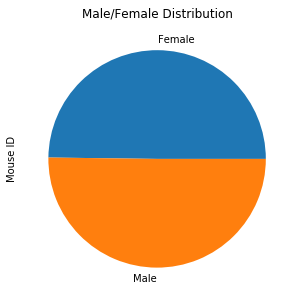

In [364]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex["Mouse ID"].plot(kind="pie", subplots=True, figsize=(5,5))

plt.title("Male/Female Distribution")

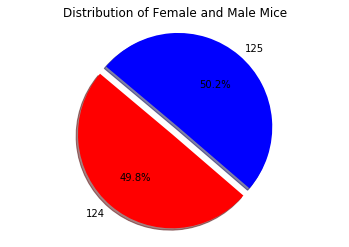

In [365]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
py_labels = ["Female","Male"]
py_values = sex["Mouse ID"]
py_colors = ["red","blue"]
explode = (0.1,0)

plt.pie(py_values, explode=explode, labels=py_values, colors=py_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.title("Distribution of Female and Male Mice")

plt.show()

## Quartiles, Outliers and Boxplots

In [377]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_stat = cleanmouse_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
ceftamin_stat = cleanmouse_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
infubinol_stat = cleanmouse_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ramicane_stat = cleanmouse_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]


In [367]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)
cap_stat=capomulin_stat["Tumor Volume (mm3)"]
cef_stat=ceftamin_stat["Tumor Volume (mm3)"]
inf_stat=infubinol_stat["Tumor Volume (mm3)"]
ram_stat=ramicane_stat["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

#Capomulin 
cap_quartiles = cap_stat.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

print(f"Capomulin")
print(f"The lower quartile is: {cap_lowerq}")
print(f"The upper quartile is: {cap_upperq}")
print(f"The interquartile is: {cap_iqr}")
print(f"The the median is: {cap_quartiles[0.5]} ")

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")
    
#Ceftamin
cef_quartiles = cef_stat.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq

print(f"Ceftamin")
print(f"The lower quartile is: {cef_lowerq}")
print(f"The upper quartile is: {cef_upperq}")
print(f"The interquartile is: {cef_iqr}")
print(f"The the median is: {cef_quartiles[0.5]} ")

cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.") 

#Infubinol
inf_quartiles = inf_stat.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

print(f"Infubinol")
print(f"The lower quartile is: {inf_lowerq}")
print(f"The upper quartile is: {inf_upperq}")
print(f"The interquartile is: {inf_iqr}")
print(f"The the median is: {inf_quartiles[0.5]} ")

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")    

#Ramicane
ram_quartiles = ram_stat.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-cef_lowerq

print(f"Ramicane")
print(f"The lower quartile is: {ram_lowerq}")
print(f"The upper quartile is: {ram_upperq}")
print(f"The interquartile is: {ram_iqr}")
print(f"The the median is: {ram_quartiles[0.5]} ")

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")    
   

Capomulin
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile is: 7.781863460000004
The the median is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Ceftamin
The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile is: 15.577752179999997
The the median is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Infubinol
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile is: 11.477135160000003
The the median is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Ramicane
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile is: -8.063071579999999
The the median is: 36.56165229 
Values below 43.65507692 could be outliers.
Values above 28.5643989 could be outliers.


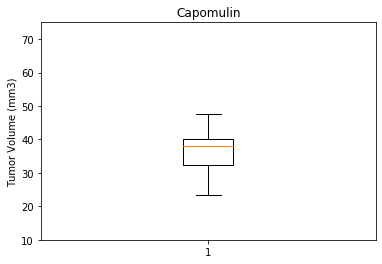

In [368]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#my_dict = {"Capomulin":[cap_stat], "Ceftamin":[cef_stat], "Infubinol":[inf_stat], "Ramicane":[ram_stat]}
fig1,ax1= plt.subplots()
ax1.boxplot(cap_stat)
ax1.set_title('Capomulin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_ylim(10,75)
plt.show()

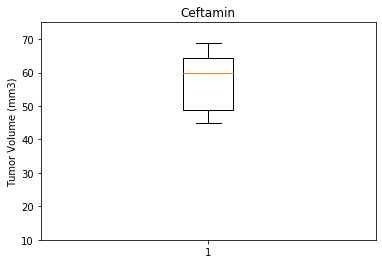

In [369]:
fig2,ax1= plt.subplots()
ax1.boxplot(cef_stat)
ax1.set_title('Ceftamin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_ylim(10,75)
plt.show()

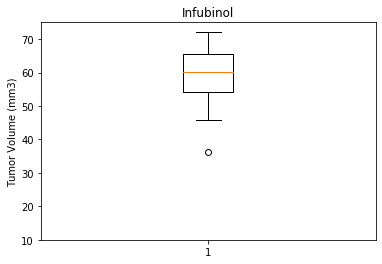

In [370]:
fig3,ax1= plt.subplots()
ax1.boxplot(inf_stat)
ax1.set_title('Infubinol')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_ylim(10,75)
plt.show()

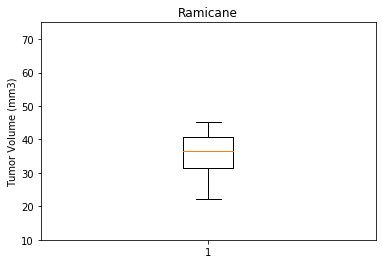

In [371]:
fig4,ax1= plt.subplots()
ax1.boxplot(ram_stat)
ax1.set_title('Ramicane')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_ylim(10,75)
plt.show()

## Line and Scatter Plots

In [372]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [373]:
timepoint_df = capomulin_df.groupby(['Timepoint'])
tumor_df=timepoint_df.mean()
tumor_df

,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Timepoint,,,,
0,14.040000,20.120000,45.000000,0.000000
5,14.040000,20.120000,44.266086,0.160000
10,14.040000,20.120000,43.084291,0.320000
15,13.666667,20.000000,42.064317,0.375000
20,13.304348,19.782609,40.716325,0.652174
25,13.181818,19.909091,39.939528,0.818182
30,13.181818,19.909091,38.769339,1.090909
35,13.181818,19.909091,37.816839,1.181818
40,12.809524,19.857143,36.958001,1.380952


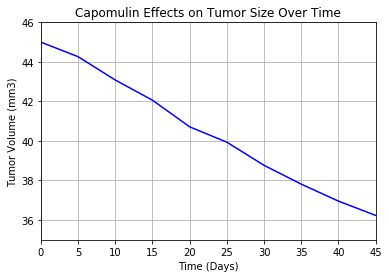

In [374]:
# Create the X and Y axis lists
time = [0,5,10,15,20,25,30,35,40,45]
line_values=tumor_df["Tumor Volume (mm3)"]

# Plot the chart and apply some styling
tumor, = plt.plot(time, line_values, color="blue", label="Tumor Volume (mm3)")

# Add labels to X and Y axes :: Add title
plt.title("Capomulin Effects on Tumor Size Over Time")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Set the limits for the X and Y axes
plt.xlim(0,45)
plt.ylim(35,46)

# Add in a grid for the chart
plt.grid()

Text(0, 0.5, 'Tumor Volume (mm3)')

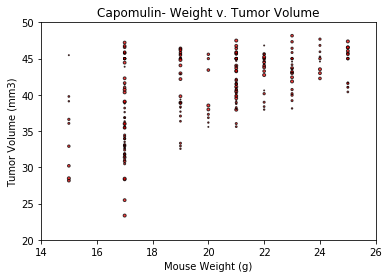

In [375]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight=capomulin_df["Weight (g)"]
tumor_vol=capomulin_df["Tumor Volume (mm3)"]
plt.scatter(weight, tumor_vol, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

# The y limits of our scatter plot is 0 to 1
plt.ylim(20, 50)
# The x limits of our scatter plot is 0 to 100
plt.xlim(14, 26)

plt.title("Capomulin- Weight v. Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

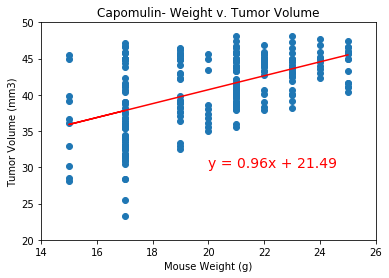

In [376]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Add the linear regression equation and line to plot
x_values = weight
y_values = tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=14,color="red")
plt.title("Capomulin- Weight v. Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(14, 26)
plt.ylim(20, 50)

plt.show()